## Corona nova base

# bibliotecas, ETL dos dados

### 1.1. Bibliotecas e visualização

In [1]:
# bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

!pip install missingno
import missingno as msno

In [2]:
## configuracoes de visualizacao
pd.set_option('display.max_rows', 999)
pd.set_option('max_rows', 50)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

### 1.2. Load e ETL dos dados

In [3]:
base = pd.read_excel('Kaggle_dataset_covid19.xlsx')
base.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Platelets.1,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [4]:
# retira espacos e caracteres estranhos nos nomes das colunas
base.columns = base.columns.str.lstrip()
base.columns = base.columns.str.rstrip()
base.columns = base.columns.str.replace(" #","_Contagem")
base.columns = base.columns.str.replace(" ","_")
base.columns = base.columns.str.replace("(","_")
base.columns = base.columns.str.replace(")","")
base.columns = base.columns.str.replace("__","_")
#base.to_excel("Base_Verificacao.xlsx")
base.head()

,Patient_ID,Patient_age_quantile,SARS-Cov-2_exam_result,"Patient_addmited_to_regular_ward_1=yes,_0=no","Patient_addmited_to_semi-intensive_unit_1=yes,_0=no","Patient_addmited_to_intensive_care_unit_1=yes,_0=no",Hematocrit,Hemoglobin,Platelets,Platelets.1,Mean_platelet_volume,Red_blood_Cells,Lymphocytes,Mean_corpuscular_hemoglobin_concentration _MCHC,Leukocytes,Basophils,Mean_corpuscular_hemoglobin_MCH,Eosinophils,Mean_corpuscular_volume_MCV,Monocytes,Red_blood_cell_distribution_width_RDW,Serum_Glucose,Respiratory_Syncytial_Virus,Influenza_A,Influenza_B,Parainfluenza_1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma_pneumoniae,Coronavirus_HKU1,Parainfluenza_3,Chlamydophila_pneumoniae,Adenovirus,Parainfluenza_4,Coronavirus229E,CoronavirusOC43,Inf_A_H1N1_2009,Bordetella_pertussis,Metapneumovirus,Parainfluenza_2,Neutrophils,Urea,Proteina_C_reativa_mg/dL,Creatinine,Potassium,Sodium,"Influenza_B,_rapid_test","Influenza_A,_rapid_test",Alanine_transaminase,Aspartate_transaminase,Gamma-glutamyltransferase,Total_Bilirubin,Direct_Bilirubin,Indirect_Bilirubin,Alkaline_phosphatase,Ionized_calcium,Strepto_A,Magnesium,pCO2_venous_blood_gas_analysis,Hb_saturation_venous_blood_gas_analysis,Base_excess_venous_blood_gas_analysis,pO2_venous_blood_gas_analysis,Fio2_venous_blood_gas_analysis,Total_CO2_venous_blood_gas_analysis,pH_venous_blood_gas_analysis,HCO3_venous_blood_gas_analysis,Rods_Contagem,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine_-_Esterase,Urine_-_Aspect,Urine_-_pH,Urine_-_Hemoglobin,Urine_-_Bile_pigments,Urine_-_Ketone_Bodies,Urine_-_Nitrite,Urine_-_Density,Urine_-_Urobilinogen,Urine_-_Protein,Urine_-_Sugar,Urine_-_Leukocytes,Urine_-_Crystals,Urine_-_Red_blood_cells,Urine_-_Hyaline_cylinders,Urine_-_Granular_cylinders,Urine_-_Yeasts,Urine_-_Color,Partial_thromboplastin_time _PTT,Relationship_Patient/Normal,International_normalized_ratio_INR,Lactic_Dehydrogenase,"Prothrombin_time_PT,_Activity",Vitamin_B12,Creatine_phosphokinase _CPK,Ferritin,Arterial_Lactic_Acid,Lipase_dosage,D-Dimer,Albumin,Hb_saturation_arterial_blood_gases,pCO2_arterial_blood_gas_analysis,Base_excess_arterial_blood_gas_analysis,pH_arterial_blood_gas_analysis,Total_CO2_arterial_blood_gas_analysis,HCO3_arterial_blood_gas_analysis,pO2_arterial_blood_gas_analysis,Arteiral_Fio2,Phosphor,ctO2_arterial_blood_gas_analysis
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# tudo maiuscula
base = base.apply(lambda x: x.astype(str).str.upper())

# tipos de dados
data_types = pd.read_excel("Data_types.xlsx")
Variaveis_String = list(data_types[data_types["tipo"]=="object"]["variavel"])
Variaveis_Float =  list(data_types[data_types["tipo"]=="float64"]["variavel"])
Variaveis_Int =  list(data_types[data_types["tipo"]=="int64"]["variavel"])

# string
for col in Variaveis_String:
    base[col] = base[col].astype("object")

# float
base["Urine_-_Leukocytes"] = base["Urine_-_Leukocytes"].apply(lambda x: np.where(">"in str(x),np.nan,x))
base["Urine_-_Leukocytes"] = base["Urine_-_Leukocytes"].apply(lambda x: np.where("<"in str(x),np.nan,x))

for col in Variaveis_Float:
    base[col] = base[col].astype("float")

# int
for col in Variaveis_Int:
    base[col] = base[col].astype("int")
    

In [6]:
base.dtypes

Patient_ID                                             object 
Patient_age_quantile                                   object 
SARS-Cov-2_exam_result                                 object 
Patient_addmited_to_regular_ward_1=yes,_0=no           int32  
Patient_addmited_to_semi-intensive_unit_1=yes,_0=no    int32  
Patient_addmited_to_intensive_care_unit_1=yes,_0=no    int32  
Hematocrit                                             float64
Hemoglobin                                             float64
Platelets                                              float64
Platelets.1                                            float64
Mean_platelet_volume                                   float64
Red_blood_Cells                                        float64
Lymphocytes                                            float64
Mean_corpuscular_hemoglobin_concentration _MCHC        float64
Leukocytes                                             float64
Basophils                                              

In [7]:
# codifica o target
base['Result_code'] = np.where(base["SARS-Cov-2_exam_result"]=="POSITIVE",1,0)
base['Result_code'] = base['Result_code'].astype("int64")
# retira o original
base = base.drop(columns=['SARS-Cov-2_exam_result'])

# corrige problema dos NaN
base= base.replace("NAN",np.nan)
base.head()

,Patient_ID,Patient_age_quantile,"Patient_addmited_to_regular_ward_1=yes,_0=no","Patient_addmited_to_semi-intensive_unit_1=yes,_0=no","Patient_addmited_to_intensive_care_unit_1=yes,_0=no",Hematocrit,Hemoglobin,Platelets,Platelets.1,Mean_platelet_volume,Red_blood_Cells,Lymphocytes,Mean_corpuscular_hemoglobin_concentration _MCHC,Leukocytes,Basophils,Mean_corpuscular_hemoglobin_MCH,Eosinophils,Mean_corpuscular_volume_MCV,Monocytes,Red_blood_cell_distribution_width_RDW,Serum_Glucose,Respiratory_Syncytial_Virus,Influenza_A,Influenza_B,Parainfluenza_1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma_pneumoniae,Coronavirus_HKU1,Parainfluenza_3,Chlamydophila_pneumoniae,Adenovirus,Parainfluenza_4,Coronavirus229E,CoronavirusOC43,Inf_A_H1N1_2009,Bordetella_pertussis,Metapneumovirus,Parainfluenza_2,Neutrophils,Urea,Proteina_C_reativa_mg/dL,Creatinine,Potassium,Sodium,"Influenza_B,_rapid_test","Influenza_A,_rapid_test",Alanine_transaminase,Aspartate_transaminase,Gamma-glutamyltransferase,Total_Bilirubin,Direct_Bilirubin,Indirect_Bilirubin,Alkaline_phosphatase,Ionized_calcium,Strepto_A,Magnesium,pCO2_venous_blood_gas_analysis,Hb_saturation_venous_blood_gas_analysis,Base_excess_venous_blood_gas_analysis,pO2_venous_blood_gas_analysis,Fio2_venous_blood_gas_analysis,Total_CO2_venous_blood_gas_analysis,pH_venous_blood_gas_analysis,HCO3_venous_blood_gas_analysis,Rods_Contagem,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine_-_Esterase,Urine_-_Aspect,Urine_-_pH,Urine_-_Hemoglobin,Urine_-_Bile_pigments,Urine_-_Ketone_Bodies,Urine_-_Nitrite,Urine_-_Density,Urine_-_Urobilinogen,Urine_-_Protein,Urine_-_Sugar,Urine_-_Leukocytes,Urine_-_Crystals,Urine_-_Red_blood_cells,Urine_-_Hyaline_cylinders,Urine_-_Granular_cylinders,Urine_-_Yeasts,Urine_-_Color,Partial_thromboplastin_time _PTT,Relationship_Patient/Normal,International_normalized_ratio_INR,Lactic_Dehydrogenase,"Prothrombin_time_PT,_Activity",Vitamin_B12,Creatine_phosphokinase _CPK,Ferritin,Arterial_Lactic_Acid,Lipase_dosage,D-Dimer,Albumin,Hb_saturation_arterial_blood_gases,pCO2_arterial_blood_gas_analysis,Base_excess_arterial_blood_gas_analysis,pH_arterial_blood_gas_analysis,Total_CO2_arterial_blood_gas_analysis,HCO3_arterial_blood_gas_analysis,pO2_arterial_blood_gas_analysis,Arteiral_Fio2,Phosphor,ctO2_arterial_blood_gas_analysis,Result_code
0,44477F75E8169D2,13,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,126E9DD13932F68,17,0,0,0,0.236515,-0.02234,-0.517413,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,NOT_DETECTED,NOT_DETECTED,NOT_DETECTED,NOT_DETECTED,NOT_DETECTED,DETECTED,NaN,NOT_DETECTED,NOT_DETECTED,NOT_DETECTED,NOT_DETECTED,NOT_DETECTED,NOT_DETECTED,NOT_DETECTED,NOT_DETECTED,NOT_DETECTED,NOT_DETECTED,NOT_DETECTED,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,NEGATIVE,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,A46B4402A0E5696,8,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,F7D619A94F97C45,5,0,0,0,NaN,Na

## EDA

### 2.1. Valores Unicos

In [8]:
Base_Valores_Repeticao = pd.DataFrame(base["Patient_ID"].value_counts())
Base_Valores_Repeticao.columns = ["Qts_Repeticao"]
Base_Valores_Repeticao["Patient_ID"] = Base_Valores_Repeticao.index
Base_Valores_Repeticao.reset_index(inplace=True,drop=True)
Base_Valores_Repeticao.head()

,Qts_Repeticao,Patient_ID
0,1,3E8FE76E7466C3A
1,1,78D01232E2445F5
2,1,184D5E336BC75E4
3,1,2D6CED18BA348FB
4,1,A06C6DF671057CA


Não há repetições. (Na primeira base havia várias repetições).

In [9]:
#Base final: apesar de nao fazer sentido, o motivo é para compatibilizar com o codigo construido para a primeira base de dados
base_final = base.copy()

### 2.1. Nulos

In [10]:
# Porcentagem de nulos
columns_prop= 100*pd.DataFrame(base_final.isnull().sum()/base_final.shape[0])
columns_prop.columns = ["Proporcao_de_Ausencia"]
columns_prop["Variavel"] = columns_prop.index
columns_prop.reset_index(inplace=True,drop=True)
columns_prop = columns_prop.sort_values(by = "Proporcao_de_Ausencia",ascending=False)
columns_prop.head(10)

,Proporcao_de_Ausencia,Variavel
81,100.000000,Urine_-_Sugar
89,100.000000,Partial_thromboplastin_time _PTT
99,100.000000,D-Dimer
27,100.000000,Mycoplasma_pneumoniae
93,100.000000,"Prothrombin_time_PT,_Activity"
61,99.982282,Fio2_venous_blood_gas_analysis
77,99.982282,Urine_-_Nitrite
94,99.946846,Vitamin_B12
98,99.858257,Lipase_dosage
100,99.769667,Albumin


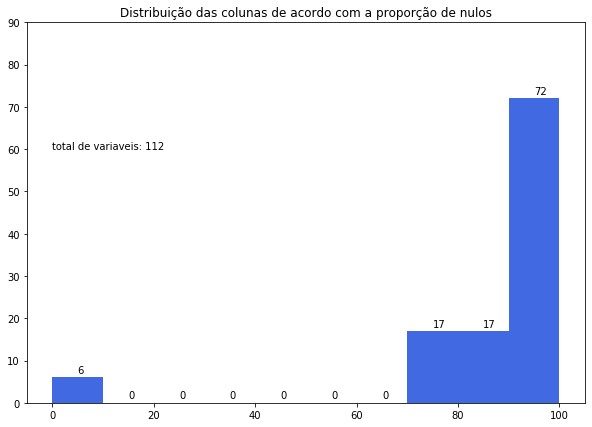

In [11]:
plt.figure(figsize=(10,7))
grafico = plt.hist(columns_prop["Proporcao_de_Ausencia"],bins=10,linewidth=2, facecolor='royalblue')
plt.title("Distribuição das colunas de acordo com a proporção de nulos")
plt.text(0.00,60,"total de variaveis: "+str(len(base.columns)))
plt.ylim([0,90])
for i in range(10):
    plt.text(grafico[1][i]+5,grafico[0][i]+1,str(int(grafico[0][i])))
plt.show()

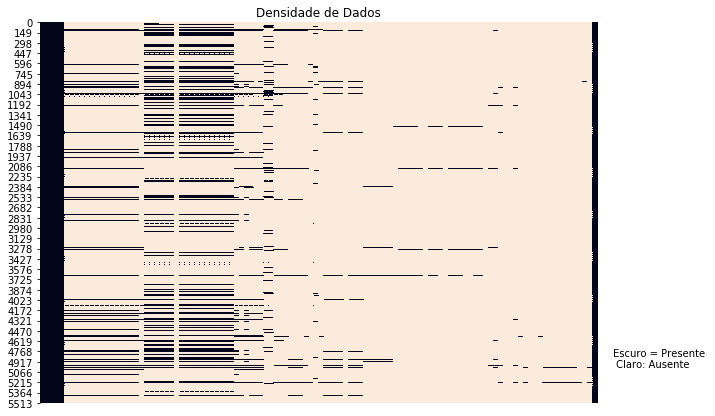

In [58]:
plt.figure(figsize=(10,7))
fig = sns.heatmap(base_final.isnull(), cbar=False,cmap=sns.cm.rocket)
plt.title("Densidade de Dados")
fig.axes.get_xaxis().set_visible(False)
plt.text(115,5000,"Escuro = Presente \n Claro: Ausente")
plt.show()

Base que pode ser considerada uma matriz esparsa, devido ao excesso de nulls, das 112 variaveis temos 72 variaveis com nulls entre 90 a 100% dos dados.

### 2.2. Balanceamento da classe alvo (detectado não detectado)

In [13]:
prop_base = np.bincount(base['Result_code'])
prop_base = round(100*pd.DataFrame(prop_base/sum(prop_base),["Não detectado","detectado"]),2)
prop_base["Resultado"] = prop_base.index
prop_base.reset_index(inplace=True,drop=True)
prop_base.columns = ["proporcao_%","Resultado"]
prop_base

,proporcao_%,Resultado
0,90.11,Não detectado
1,9.89,detectado


Notamos que as classes não são balenceadas, sendo que o sucesso (paciente positivo para corona) é de aproximadamente 10%.

### 2.3. Variaveis quantitativas mais discriminantes para o resultado.

Adotamos um criterio para a seleção de variaveis, baseado no p-valor obtido separado a base de dados em duas populações (detectado e não detectado) e comparando as médias de cada variável. Claramente há criticas sobre a seleção de variaveis atraves do p-valor, mas devido ao tempo adotaresmos tal método haja visto que a seleção de variaveis baseado na literatura é complicado devido a brevidade da doença.

As variaveis selecionadas serão com p-valor do teste de igualdade de médias abaixo de 0.05. Adotamos o teste t que supoe normalidade dos dados(deveriamos realizar um estudo da normalidade de cada variavel, com o uso de testes de normalidade como Shapiro-wilk ou Kolgomorov...).

In [14]:
p_values = []
for variavel in Variaveis_Float:
    base_detectado = base_final[base_final["Result_code"]==1][variavel].dropna().astype("float")
    base_N_detectado = base_final[base_final["Result_code"]==0][variavel].dropna().astype("float")
    stat, p = stats.ttest_ind(base_detectado, base_N_detectado, equal_var = False,nan_policy="omit")
    p_values.append([variavel, p])
base_p_value = pd.DataFrame(p_values)
base_p_value.columns = ["variavel","p_valor"]
base_p_value["p_valor"] = base_p_value["p_valor"].astype("float")
base_p_value = base_p_value.sort_values("p_valor")

C:\Users\csh\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\csh\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\csh\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\csh\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\csh\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [15]:
base_p_value.head()

,variavel,p_valor
8,Leukocytes,6.692452e-18
2,Platelets,6.879271e-18
3,Platelets.1,6.879280e-18
11,Eosinophils,6.221967e-15
13,Monocytes,3.727560e-05


In [16]:
base_features_quantitativos = base_p_value[base_p_value["p_valor"]<=0.50]
print("Quantidade de Features numericas antes: ",len(Variaveis_Float))
print("Quantidade de Features numericas Depois: ",base_features_quantitativos.shape[0])

Quantidade de Features numericas antes:  70
Quantidade de Features numericas Depois:  50


### 2.4. variaveis qualitativas

Para dados qualitativos, usamos as tabelas de contigências, juntamente com o teste $\mathcal{X}^{2}$ de fisher.

Excluimos as variaveis que envolvem datas e tambem as flags por constituirem variaveis vazadas.

In [17]:
import statsmodels.api as sm

In [18]:
Colunas_Object = list(base_final.select_dtypes("object").columns)
lista_exclusao = ["Patient_ID"]
Lista_Variaveis_Qualitativas = [a for a in Colunas_Object if a not in lista_exclusao]
Lista_Variaveis_Qualitativas

['Patient_age_quantile',
 'Respiratory_Syncytial_Virus',
 'Influenza_A',
 'Influenza_B',
 'Parainfluenza_1',
 'CoronavirusNL63',
 'Rhinovirus/Enterovirus',
 'Coronavirus_HKU1',
 'Parainfluenza_3',
 'Chlamydophila_pneumoniae',
 'Adenovirus',
 'Parainfluenza_4',
 'Coronavirus229E',
 'CoronavirusOC43',
 'Inf_A_H1N1_2009',
 'Bordetella_pertussis',
 'Metapneumovirus',
 'Parainfluenza_2',
 'Influenza_B,_rapid_test',
 'Influenza_A,_rapid_test',
 'Strepto_A',
 'Urine_-_Esterase',
 'Urine_-_Aspect',
 'Urine_-_pH',
 'Urine_-_Hemoglobin',
 'Urine_-_Bile_pigments',
 'Urine_-_Ketone_Bodies',
 'Urine_-_Nitrite',
 'Urine_-_Urobilinogen',
 'Urine_-_Protein',
 'Urine_-_Crystals',
 'Urine_-_Hyaline_cylinders',
 'Urine_-_Granular_cylinders',
 'Urine_-_Yeasts',
 'Urine_-_Color']

In [19]:
lista_p_valor = []
for col in Lista_Variaveis_Qualitativas:
    dados = base_final[["Result_code",col]]
    tabela = sm.stats.Table.from_data(dados)
    p_valor = tabela.test_nominal_association().pvalue
    lista_p_valor.append([col,p_valor])
base_p_value_quali = pd.DataFrame(lista_p_valor)
base_p_value_quali.columns = ["variavel","p_valor"]
base_p_value_quali["p_valor"] = base_p_value_quali["p_valor"].astype("float")
base_p_value_quali.sort_values("p_valor")
base_p_value_quali.head()

,variavel,p_valor
0,Patient_age_quantile,0.000000
1,Respiratory_Syncytial_Virus,0.048932
2,Influenza_A,0.379246
3,Influenza_B,0.151191
4,Parainfluenza_1,0.685611


In [20]:
base_features_qualitativos = base_p_value_quali[base_p_value_quali["p_valor"]<=0.30]
print("Quantidade de variaveis antes: ",len(Lista_Variaveis_Qualitativas))
print("Quantidade de variaveis depois: ",base_features_qualitativos.shape[0])

Quantidade de variaveis antes:  35
Quantidade de variaveis depois:  8


### 2.3. Conjunto de Features Finais

Nesta fazer iremos fazer o cruzamento com os dados sobre a densidade dos dados para cada variavel, iremos cortar as variaveis que apresentarem excessos de missings.

In [21]:
# uniao das variaveis qualitativas e quantitativas que poderao ser usadas no estudo
base_features = pd.concat([base_features_quantitativos,base_features_qualitativos])

# join com a tabela que contem informacao sobre a quantidade de missings
base_features_full =pd.merge(base_features,columns_prop,left_on="variavel",right_on="Variavel")
base_features_full = base_features_full.drop(columns=['Variavel'])
base_features_full.head()

,variavel,p_valor,Proporcao_de_Ausencia
0,Leukocytes,6.692452e-18,89.333806
1,Platelets,6.879271e-18,89.333806
2,Platelets.1,6.879280e-18,89.333806
3,Eosinophils,6.221967e-15,89.333806
4,Monocytes,3.727560e-05,89.351524


In [22]:
tradeoof_nulls = 90  # em porcentagem
base_features_selecionados = base_features_full[base_features_full["Proporcao_de_Ausencia"]<=tradeoof_nulls]
print("Quantidade de variaveis totais (quali+quant) antes do tradeoff de Nulls: ",base_features.shape[0])
print("Quantidade de variaveis totais (quali+quant) antes do tradeoff de Nulls: ",base_features_selecionados.shape[0])

Quantidade de variaveis totais (quali+quant) antes do tradeoff de Nulls:  58
Quantidade de variaveis totais (quali+quant) antes do tradeoff de Nulls:  19


In [23]:
# cruzamento com a base final, contendo os dados
lista_features_finais = list(base_features_selecionados["variavel"])
lista_features_finais.append("Result_code")
lista_features_finais

['Leukocytes',
 'Platelets',
 'Platelets.1',
 'Eosinophils',
 'Monocytes',
 'Red_blood_Cells',
 'Hemoglobin',
 'Hematocrit',
 'Mean_platelet_volume',
 'Basophils',
 'Mean_corpuscular_volume_MCV',
 'Mean_corpuscular_hemoglobin_concentration\xa0_MCHC',
 'Red_blood_cell_distribution_width_RDW',
 'Patient_age_quantile',
 'Respiratory_Syncytial_Virus',
 'Influenza_B',
 'Rhinovirus/Enterovirus',
 'Inf_A_H1N1_2009',
 'Influenza_A,_rapid_test',
 'Result_code']

In [24]:
# base final
base_modelos = base_final[[a for a in lista_features_finais]]
base_modelos.shape

(5644, 20)

In [25]:
base_modelos.head()

,Leukocytes,Platelets,Platelets.1,Eosinophils,Monocytes,Red_blood_Cells,Hemoglobin,Hematocrit,Mean_platelet_volume,Basophils,Mean_corpuscular_volume_MCV,Mean_corpuscular_hemoglobin_concentration _MCHC,Red_blood_cell_distribution_width_RDW,Patient_age_quantile,Respiratory_Syncytial_Virus,Influenza_B,Rhinovirus/Enterovirus,Inf_A_H1N1_2009,"Influenza_A,_rapid_test",Result_code
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,NaN,NaN,NaN,NaN,NaN,0
1,-0.09461,-0.517413,-0.517413,1.482158,0.357547,0.102004,-0.02234,0.236515,0.010677,-0.223767,0.166192,-0.95079,-0.625073,17,NOT_DETECTED,NOT_DETECTED,DETECTED,NOT_DETECTED,NEGATIVE,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,NOT_DETECTED,NOT_DETECTED,DETECTED,NOT_DETECTED,NaN,0


### 2.4. one hot enconding

In [26]:
Colunas_String = list(base_modelos.select_dtypes('object').columns)
Colunas_String

['Patient_age_quantile',
 'Respiratory_Syncytial_Virus',
 'Influenza_B',
 'Rhinovirus/Enterovirus',
 'Inf_A_H1N1_2009',
 'Influenza_A,_rapid_test']

In [27]:
#One hot-encoding
base_modelos_v2 = base_modelos.copy()
for col in  Colunas_String:              
        base_modelos_v2 = pd.concat([base_modelos_v2,pd.get_dummies(base_modelos[col], prefix=col)],axis=1)
        base_modelos_v2 = base_modelos_v2.drop(columns = [col])        

In [28]:
base_modelos_v2.head()

,Leukocytes,Platelets,Platelets.1,Eosinophils,Monocytes,Red_blood_Cells,Hemoglobin,Hematocrit,Mean_platelet_volume,Basophils,Mean_corpuscular_volume_MCV,Mean_corpuscular_hemoglobin_concentration _MCHC,Red_blood_cell_distribution_width_RDW,Result_code,Patient_age_quantile_0,Patient_age_quantile_1,Patient_age_quantile_10,Patient_age_quantile_11,Patient_age_quantile_12,Patient_age_quantile_13,Patient_age_quantile_14,Patient_age_quantile_15,Patient_age_quantile_16,Patient_age_quantile_17,Patient_age_quantile_18,Patient_age_quantile_19,Patient_age_quantile_2,Patient_age_quantile_3,Patient_age_quantile_4,Patient_age_quantile_5,Patient_age_quantile_6,Patient_age_quantile_7,Patient_age_quantile_8,Patient_age_quantile_9,Respiratory_Syncytial_Virus_DETECTED,Respiratory_Syncytial_Virus_NOT_DETECTED,Influenza_B_DETECTED,Influenza_B_NOT_DETECTED,Rhinovirus/Enterovirus_DETECTED,Rhinovirus/Enterovirus_NOT_DETECTED,Inf_A_H1N1_2009_DETECTED,Inf_A_H1N1_2009_NOT_DETECTED,"Influenza_A,_rapid_test_NEGATIVE","Influenza_A,_rapid_test_POSITIVE"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-0.09461,-0.517413,-0.517413,1.482158,0.357547,0.102004,-0.02234,0.236515,0.010677,-0.223767,0.166192,-0.95079,-0.625073,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0


In [29]:
Colunas = list(base_modelos_v2.columns)
target = ['Result_code']
Colunas.remove('Result_code')
base_modelos_final = base_modelos_v2.loc[:,Colunas + target]
base_modelos_final.shape

(5644, 44)

In [30]:
base_modelos_final.head()

,Leukocytes,Platelets,Platelets.1,Eosinophils,Monocytes,Red_blood_Cells,Hemoglobin,Hematocrit,Mean_platelet_volume,Basophils,Mean_corpuscular_volume_MCV,Mean_corpuscular_hemoglobin_concentration _MCHC,Red_blood_cell_distribution_width_RDW,Patient_age_quantile_0,Patient_age_quantile_1,Patient_age_quantile_10,Patient_age_quantile_11,Patient_age_quantile_12,Patient_age_quantile_13,Patient_age_quantile_14,Patient_age_quantile_15,Patient_age_quantile_16,Patient_age_quantile_17,Patient_age_quantile_18,Patient_age_quantile_19,Patient_age_quantile_2,Patient_age_quantile_3,Patient_age_quantile_4,Patient_age_quantile_5,Patient_age_quantile_6,Patient_age_quantile_7,Patient_age_quantile_8,Patient_age_quantile_9,Respiratory_Syncytial_Virus_DETECTED,Respiratory_Syncytial_Virus_NOT_DETECTED,Influenza_B_DETECTED,Influenza_B_NOT_DETECTED,Rhinovirus/Enterovirus_DETECTED,Rhinovirus/Enterovirus_NOT_DETECTED,Inf_A_H1N1_2009_DETECTED,Inf_A_H1N1_2009_NOT_DETECTED,"Influenza_A,_rapid_test_NEGATIVE","Influenza_A,_rapid_test_POSITIVE",Result_code
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-0.09461,-0.517413,-0.517413,1.482158,0.357547,0.102004,-0.02234,0.236515,0.010677,-0.223767,0.166192,-0.95079,-0.625073,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0


In [31]:
base_modelos_final.dtypes

Leukocytes                                         float64
Platelets                                          float64
Platelets.1                                        float64
Eosinophils                                        float64
Monocytes                                          float64
Red_blood_Cells                                    float64
Hemoglobin                                         float64
Hematocrit                                         float64
Mean_platelet_volume                               float64
Basophils                                          float64
Mean_corpuscular_volume_MCV                        float64
Mean_corpuscular_hemoglobin_concentration _MCHC    float64
Red_blood_cell_distribution_width_RDW              float64
Patient_age_quantile_0                             uint8  
Patient_age_quantile_1                             uint8  
Patient_age_quantile_10                            uint8  
Patient_age_quantile_11                            uint8

# 3. modelos

### 3.1. Load das bibliotecas de modelagem

In [32]:
# metodos de oversampling
# !pip install imblearn
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from sklearn.impute import SimpleImputer
from imblearn.pipeline import make_pipeline

# preparacao dos dados
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

# modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

from numpy import loadtxt
#!pip install xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from numpy import loadtxt

from xgboost import XGBClassifier

# workflow
from sklearn.pipeline import Pipeline

# metricas
from sklearn.metrics import confusion_matrix,accuracy_score, auc,roc_auc_score,classification_report, f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.metrics import plot_confusion_matrix

Using TensorFlow backend.


In [33]:
base_modelos_final.dtypes

Leukocytes                                         float64
Platelets                                          float64
Platelets.1                                        float64
Eosinophils                                        float64
Monocytes                                          float64
Red_blood_Cells                                    float64
Hemoglobin                                         float64
Hematocrit                                         float64
Mean_platelet_volume                               float64
Basophils                                          float64
Mean_corpuscular_volume_MCV                        float64
Mean_corpuscular_hemoglobin_concentration _MCHC    float64
Red_blood_cell_distribution_width_RDW              float64
Patient_age_quantile_0                             uint8  
Patient_age_quantile_1                             uint8  
Patient_age_quantile_10                            uint8  
Patient_age_quantile_11                            uint8

In [34]:
X_train, X_test, y_train, y_test = train_test_split(base_modelos_final.iloc[:, :-1],base_modelos_final.iloc[:,-1],   
                                                                        test_size=0.2, random_state=147,stratify=base_modelos_final.iloc[:,-1])

A opção stratify faz com que a divisão seja de tal forma que a proporção da classe 1 seja mantida igual nas duas divisões.

In [35]:
print("tamanho do treino: "+str(X_train.shape[0])+" linhas com "+str(X_train.shape[1])+" Colunas")
print("tamanho do treino target : "+str(y_train.shape[0])+" linhas")
print("-----------------------")
print("tamanho do teste: "+str(X_test.shape[0])+" linhas com "+str(X_train.shape[1])+" Colunas")
print("tamanho do teste target : "+str(y_test.shape[0])+" linhas")

tamanho do treino: 4515 linhas com 43 Colunas
tamanho do treino target : 4515 linhas
-----------------------
tamanho do teste: 1129 linhas com 43 Colunas
tamanho do teste target : 1129 linhas


### 3.3. Input Data
Para o input de dados faltantes usando o input pela frequencia dominante da variavel em questão

### 3.4. Modelagem
Implementamos o cross validation na funcao abaixo, tal funcao também realiza o data agmentation.

In [37]:
def cross_valid(X_train, y_train, folds, model,Colunas_float):
    
    
    X_train.reset_index(drop=True, inplace=True)
    y_train.reset_index(drop=True, inplace=True)
    l = X_train.shape[0]
    j = l//folds
    results=[]
    for i in np.arange(0, folds):
        index_train = list(np.arange(0,j*i)) + list(np.arange((i+1)*j,l))
        index_test = list(np.arange(j*i,(i+1)*j))
        
        X_train_cut = X_train.iloc[index_train,:]
        y_train_cut = y_train[index_train]
        
        X_test_cut = X_train.iloc[index_test,:]
        y_test_cut = y_train[index_test]
        
        
        
        ### Input de dados
        
        imp = dealing_NaN(X_train_cut)
        
        X_train_cut_imp = pd.DataFrame(imp.transform(X_train_cut), columns = X_train_cut.columns)
          
        X_test_cut_imp = pd.DataFrame(imp.transform(X_test_cut), columns = X_test_cut.columns)
        
        ### SMOTE
        ### balenceamento
        
        smote = SMOTE(random_state=0)
        
        X_train_cut_imp_s, y_train_cut_s = smote.fit_resample(X_train_cut_imp, y_train_cut)
        X_train_cut_imp_s = pd.DataFrame(X_train_cut_imp_s, columns=X_train_cut_imp.columns)
        
        ### normalization
       
        scalar = StandardScaler()
        
        scalar.fit(X_train_cut_imp_s.loc[:,Colunas_float])
        
        X_train_cut_imp_s_n  = X_train_cut_imp_s.copy()
        
        X_train_cut_imp_s_n.loc[:,Colunas_float]= scalar.transform(X_train_cut_imp_s.loc[:,Colunas_float])
        
        
        
        X_test_cut_imp_n = X_test_cut_imp.copy()
        X_test_cut_imp_n.loc[:,Colunas_float]= scalar.transform(X_test_cut_imp.loc[:,Colunas_float])
        
        ### model fit
        
        model.fit(X_train_cut_imp_s_n,y_train_cut_s)
        
        ### metrics and results
        y = model.predict(X_test_cut_imp_n)     
        if len(np.unique(y)) == 1:
            roc = np.nan
        else:
            roc = roc_auc_score(y,y_test_cut)
        results.append([accuracy_score(y,y_test_cut),roc,f1_score(y,y_test_cut), precision_score(y,y_test_cut), recall_score(y,y_test_cut)])
    results = pd.DataFrame(results)
    results.columns=['accuracy_score','roc_auc_score','f1_score', 'precision_score', 'recall_score']    
    return results

### Spot check models

In [38]:
model_lg = LogisticRegression(max_iter=1000)
model_knn = KNeighborsClassifier()
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()
model_xgb = XGBClassifier()
# Colunas
Colunas_String = list(X_train.select_dtypes("uint8").columns)
Colunas_float = list(X_train.select_dtypes("float").columns)

In [39]:
results_lg = cross_valid(X_train, y_train, 10, model_lg,Colunas_float)
results_lg['model'] = 'Logistic'

In [40]:
results_knn = cross_valid(X_train, y_train, 10, model_knn,Colunas_float)
results_knn['model'] = 'K-nn'

In [41]:
results_dt = cross_valid(X_train, y_train, 10, model_dt,Colunas_float)
results_dt['model'] = 'Decision-tree'

In [42]:
results_rf = cross_valid(X_train, y_train, 10, model_rf,Colunas_float)
results_rf['model'] = 'Random Forest'

In [43]:
results_xgb = cross_valid(X_train, y_train, 10, model_xgb,Colunas_float)
results_xgb['model'] = 'XGB'

In [44]:
results = pd.concat([results_lg,results_knn,results_dt,results_rf,results_xgb])

In [45]:
def get_plots(resuts, score):
    plt.figure(figsize=(7,5))
    ax = sns.boxplot(x="model", y=score, data=results)
        #results.boxplot(grid=False)
    plt.title(score)
    plt.show()
    

### Accuracy

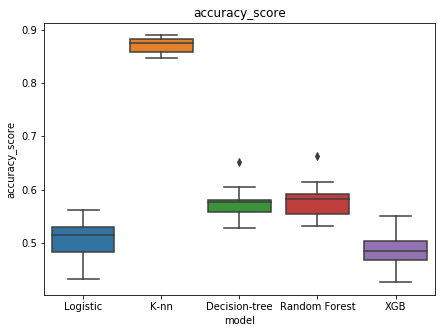

In [46]:
get_plots(results, 'accuracy_score')

### AUC

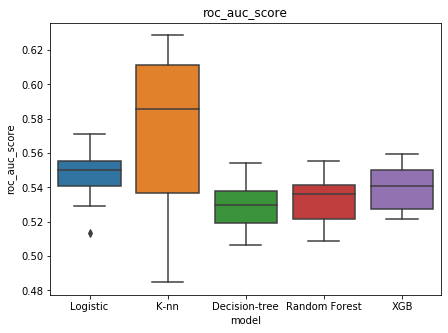

In [47]:
get_plots(results, 'roc_auc_score')

### F1_score

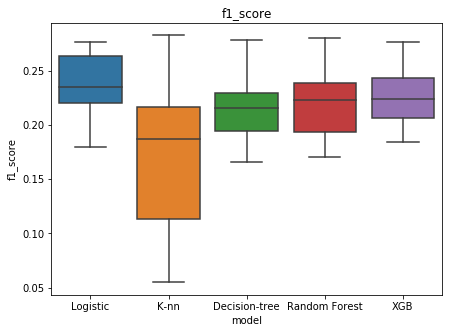

In [48]:
get_plots(results, 'f1_score')

### Precision

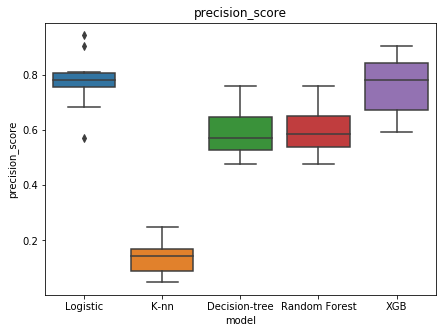

In [49]:
get_plots(results, 'precision_score')

### Recall_score

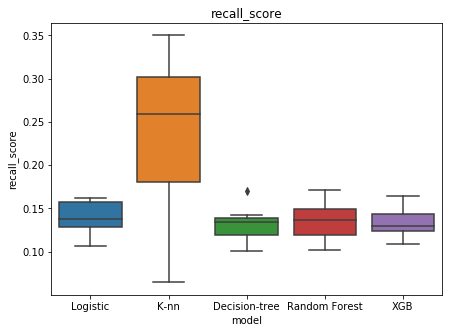

In [50]:
get_plots(results, 'recall_score')

## Fine Tuning

In [52]:
# set warnings
import warnings
warnings.filterwarnings('ignore')
Folds = 5
Metric = 'accuracy'   

In [53]:
def Get_Prepare_df(X_train, Y_train, X_test, Y_test):
    
    Colunas_float = list(X_train.select_dtypes("float").columns)
    
    ### Input de dados
        
    imp = dealing_NaN(X_train)

    X_train_imp = pd.DataFrame(imp.transform(X_train), columns = X_train.columns)

    X_test_imp = pd.DataFrame(imp.transform(X_test), columns = X_test.columns)

    ### SMOTE
    ### balenceamento

    smote = SMOTE(random_state=0)

    X_train_imp_s, y_train_s = smote.fit_resample(X_train_imp, y_train)
    X_train_imp_s = pd.DataFrame(X_train_imp_s, columns=X_train_imp.columns)

    ### normalization

    scalar = StandardScaler()

    scalar.fit(X_train_imp_s.loc[:,Colunas_float])

    X_train_imp_s_n  = X_train_imp_s.copy()

    X_train_imp_s_n.loc[:,Colunas_float]= scalar.transform(X_train_imp_s.loc[:,Colunas_float])



    X_test_imp_n = X_test_imp.copy()
    X_test_imp_n.loc[:,Colunas_float]= scalar.transform(X_test_imp.loc[:,Colunas_float])
    
    return  X_train_imp_s, y_train_s, X_test_imp_n, Y_test

In [54]:
def GridSearch_Logistic(X_train, y_train, folds,Colunas_float):
    lista_grid = []
    for C_Logistic in np.logspace(-2, 2, 5):
        for penalty in ['l1', 'l2',"elasticnet"]:
            if penalty == "l2":
                solvers = "lbfgs"
            else:
                solvers = "saga"
            for weigth_balanced in np.arange(0.5,1,0.1):
                for max_inter in  np.arange(200,1200,150):
                    try:                    
                        model = LogisticRegression(max_iter=max_inter,
                                                  C =C_Logistic,
                                                  penalty= penalty,
                                                  solver = solvers,
                                                  class_weight = {1:weigth_balanced,0:1-weigth_balanced})
                        result = cross_valid(X_train, y_train,folds, model,Colunas_float)
                        result = list(result.mean())
                        result.append({"max_iter":max_inter,
                                      "C":C_Logistic,
                                      "penalty":penalty,
                                      "solver":solvers,
                                      "weight":weigth_balanced})
                        lista_grid.append(result)
                        print("C_Logistic: "+str(round(C_Logistic,4))+" penalty: "+penalty+" max_inter: "+str(max_inter)+" Solvers: "+solvers+" weight: "+str(weigth_balanced))

                    except:
                        pass
    return lista_grid


In [55]:
Colunas_float = list(X_train.select_dtypes("float").columns)
Grid_Logistic =  GridSearch_Logistic(X_train, y_train, 5,Colunas_float)

C_Logistic: 0.01 penalty: l1 max_inter: 200 Solvers: saga weight: 0.5
C_Logistic: 0.01 penalty: l1 max_inter: 350 Solvers: saga weight: 0.5
C_Logistic: 0.01 penalty: l1 max_inter: 500 Solvers: saga weight: 0.5
C_Logistic: 0.01 penalty: l1 max_inter: 650 Solvers: saga weight: 0.5
C_Logistic: 0.01 penalty: l1 max_inter: 800 Solvers: saga weight: 0.5
C_Logistic: 0.01 penalty: l1 max_inter: 950 Solvers: saga weight: 0.5
C_Logistic: 0.01 penalty: l1 max_inter: 1100 Solvers: saga weight: 0.5
C_Logistic: 0.01 penalty: l1 max_inter: 200 Solvers: saga weight: 0.6
C_Logistic: 0.01 penalty: l1 max_inter: 350 Solvers: saga weight: 0.6
C_Logistic: 0.01 penalty: l1 max_inter: 500 Solvers: saga weight: 0.6
C_Logistic: 0.01 penalty: l1 max_inter: 650 Solvers: saga weight: 0.6
C_Logistic: 0.01 penalty: l1 max_inter: 800 Solvers: saga weight: 0.6
C_Logistic: 0.01 penalty: l1 max_inter: 950 Solvers: saga weight: 0.6
C_Logistic: 0.01 penalty: l1 max_inter: 1100 Solvers: saga weight: 0.6
C_Logistic: 0.01 p

In [61]:
Grid_Logistic2=pd.DataFrame(Grid_Logistic)
Grid_Logistic2.columns = ['accuracy_score','roc_auc_score','f1_score', 'precision_score', 'recall_score', \
                         "Parameters_model"] 
Grid_Logistic2.head()


,accuracy_score,roc_auc_score,f1_score,precision_score,recall_score,Parameters_model
0,0.885493,0.608492,0.183213,0.131208,0.306427,"{'max_iter': 200, 'C': 0.01, 'penalty': 'l1', 'solver': 'saga', 'weight': 0.5}"
1,0.885493,0.608492,0.183213,0.131208,0.306427,"{'max_iter': 350, 'C': 0.01, 'penalty': 'l1', 'solver': 'saga', 'weight': 0.5}"
2,0.885493,0.608492,0.183213,0.131208,0.306427,"{'max_iter': 500, 'C': 0.01, 'penalty': 'l1', 'solver': 'saga', 'weight': 0.5}"
3,0.885493,0.608492,0.183213,0.131208,0.306427,"{'max_iter': 650, 'C': 0.01, 'penalty': 'l1', 'solver': 'saga', 'weight': 0.5}"
4,0.885493,0.608492,0.183213,0.131208,0.306427,"{'max_iter': 800, 'C': 0.01, 'penalty': 'l1', 'solver': 'saga', 'weight': 0.5}"


In [ ]:
Grid_Logistic2

In [62]:
def Model_Selected_Logistic(X_Train,Y_Train,X_Test,Y_Test,Metric,Hyperparameters):
    
    # Select hiperparameters
    Base_Hyper = Hyperparameters.sort_values(by=[Metric],ascending=False)
    Best_Parameters = Base_Hyper.iloc[0,:]
    Best_Parameters = Best_Parameters.to_dict()
    
    # model
    weigth_class = Best_Parameters["Parameters_model"]["weight"]
    model = LogisticRegression(max_iter=Best_Parameters["Parameters_model"]["max_iter"],
                                              C =Best_Parameters["Parameters_model"]["C"],
                                              penalty= Best_Parameters["Parameters_model"]["penalty"],
                                              solver = Best_Parameters["Parameters_model"]["solver"],
                                              class_weight = {1:weigth_class,0:1-weigth_class})
    # data
    X_train_imp_s, y_train_s, X_test_imp_n, Y_test = Get_Prepare_df(X_train, y_train, X_test, y_test)
    
    #fit
    model.fit(X_train_imp_s,y_train_s)
    
    # metrics in training
    predict_y_train = model.predict(X_train_imp_s)
    metrics_train = classification_report(y_train_s, predict_y_train, labels=None, 
                                          target_names=None, sample_weight=None, 
                                          digits=2, output_dict=True, zero_division='warn')
    metrics_train = pd.DataFrame(metrics_train).transpose()
    
    # testing
    predict_y = model.predict(X_test_imp_n)
    metrics_test = classification_report(Y_test, predict_y, labels=None, 
                                          target_names=None, sample_weight=None, 
                                          digits=2, output_dict=True, zero_division='warn')
    metrics_test = pd.DataFrame(metrics_test).transpose()
    return metrics_train,metrics_test,model
    
    
    

In [68]:
# funcao para a construcao da matriz de confusao
def Confusion_matrix(model, X_test,Y_test, normalized = True):
    if normalized==True:
        disp = plot_confusion_matrix(model, X_test, Y_test,
                                 display_labels=['Negative_covid', 'Positive_covid'],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
        disp.ax_.set_title('Normalized confusion matrix')
    else:
        disp = plot_confusion_matrix(model, X_test, Y_test,
                                 display_labels=['Negative_covid', 'Positive_covid'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
        disp.ax_.set_title('Confusion matrix')
    plt.show()

In [71]:
# funcao para plot dos resultados: curvas de aprendizado e precision e recall
def Chart_report(model, X_test,Y_test):
    predict_y = model.predict(X_test)
    
    plt.figure(figsize=(20,10))
    
    # Confusion, ROC
    plt.subplot(1,2,1)
        
    prob_y = model.predict_proba(X_test)[:,1]
    fpr, tpr,_ = roc_curve(Y_test, prob_y)
    auc_value = auc(fpr, tpr)
    
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr, marker='.')
    # axis labels

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.text(0.8, 0.05, 'AUC ' + str(round(auc_value,3)))
    # show the legend
    #plt.legend()
    plt.title('ROC')    
    
    # Precision X Recall
    
    # predict probabilities
    lr_probs = model.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    # predict class values
    yhat = model.predict(X_test)
    lr_precision, lr_recall, th = precision_recall_curve(Y_test, lr_probs)
    th = np.append(th,[1])
    # plot the precision-recall curves
    no_skill = len(y_test[y_test==1]) / len(y_test)
    plt.subplot(1,2,2)
    plt.plot(th, lr_recall, marker='.', label='Recall')
    plt.plot(th, lr_precision, marker='.', label='Precision')
    # axis labels
    plt.xlabel('threshold')
    plt.ylabel('Valor')
    plt.title('Precision and Recall')
    # show the legend
    plt.legend()
    # show the plot
    
    
    
    plt.show()

### Metrica: acuracia

In [63]:
metrics_train_acuracy,metrics_test_acuracy,model_acuracy = \
        Model_Selected_Logistic(X_train,y_train,X_test,y_test,"accuracy_score",Grid_Logistic2)

In [64]:
metrics_train_acuracy

,f1-score,precision,recall,support
0,0.675206,0.525038,0.945687,4069.000000
1,0.241082,0.726823,0.144507,4069.000000
accuracy,0.545097,0.545097,0.545097,0.545097
macro avg,0.458144,0.625930,0.545097,8138.000000
weighted avg,0.458144,0.625930,0.545097,8138.000000


In [65]:
metrics_test_acuracy

,f1-score,precision,recall,support
0,0.928400,0.907895,0.949853,1017.000000
1,0.158192,0.215385,0.125000,112.000000
accuracy,0.868025,0.868025,0.868025,0.868025
macro avg,0.543296,0.561640,0.537426,1129.000000
weighted avg,0.851993,0.839196,0.868025,1129.000000


In [72]:
X_train_, Y_train_, X_test_, Y_test_ = Get_Prepare_df(X_train, y_train, X_test, y_test)

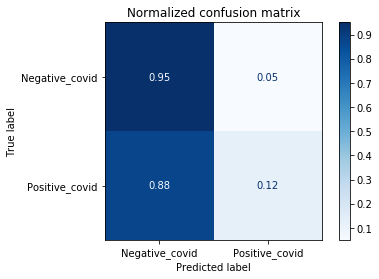

In [74]:
Confusion_matrix(model_acuracy, X_test_,Y_test_, normalized = True)

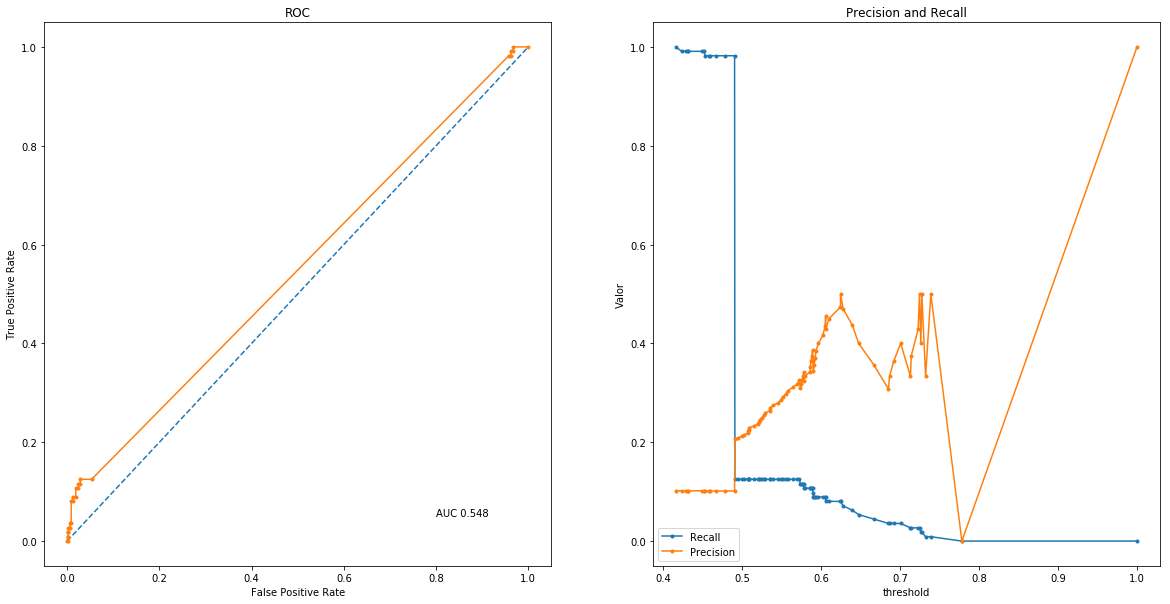

In [78]:
Chart_report(model_acuracy, X_test_,Y_test_)

### metrica: f1_score

In [80]:
metrics_train_f1,metrics_test_f1,model_f1 = \
        Model_Selected_Logistic(X_train,y_train,X_test,y_test,"f1_score",Grid_Logistic2)

In [93]:
model_f1

LogisticRegression(C=100.0, class_weight={0: 0.5, 1: 0.5}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=950, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
metrics_train_f1

,f1-score,precision,recall,support
0,0.579745,0.756628,0.469894,4069.000000
1,0.713636,0.615577,0.848857,4069.000000
accuracy,0.659376,0.659376,0.659376,0.659376
macro avg,0.646691,0.686102,0.659376,8138.000000
weighted avg,0.646691,0.686102,0.659376,8138.000000


In [82]:
metrics_test_f1

,f1-score,precision,recall,support
0,0.945780,0.908514,0.986234,1017.00000
1,0.160584,0.440000,0.098214,112.00000
accuracy,0.898140,0.898140,0.898140,0.89814
macro avg,0.553182,0.674257,0.542224,1129.00000
weighted avg,0.867887,0.862037,0.898140,1129.00000


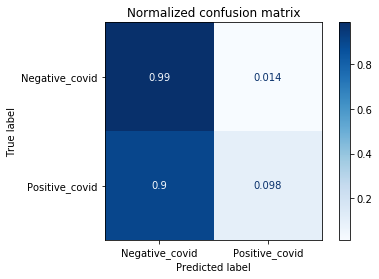

In [84]:
Confusion_matrix(model_f1, X_test_,Y_test_, normalized = True)

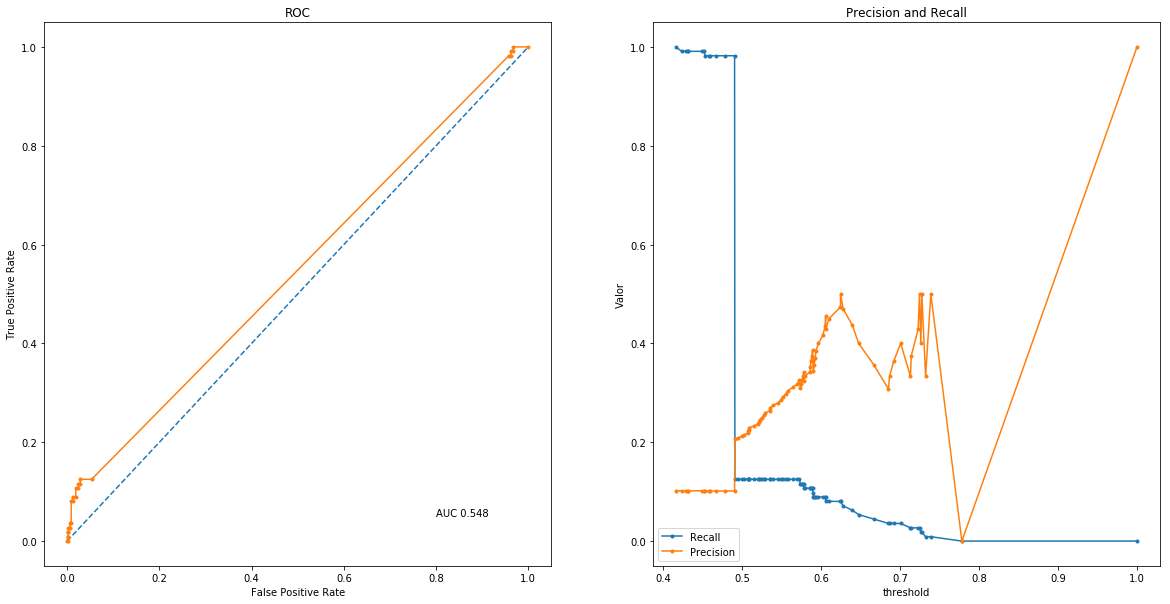

In [85]:
Chart_report(model_acuracy, X_test_,Y_test_)

### metrica: recall

In [87]:
metrics_train_recall,metrics_test_recall,model_recall = \
        Model_Selected_Logistic(X_train,y_train,X_test,y_test,"recall_score",Grid_Logistic2)

In [88]:
metrics_train_recall

,f1-score,precision,recall,support
0,0.675206,0.525038,0.945687,4069.000000
1,0.241082,0.726823,0.144507,4069.000000
accuracy,0.545097,0.545097,0.545097,0.545097
macro avg,0.458144,0.625930,0.545097,8138.000000
weighted avg,0.458144,0.625930,0.545097,8138.000000


In [89]:
metrics_test_recall

,f1-score,precision,recall,support
0,0.928400,0.907895,0.949853,1017.000000
1,0.158192,0.215385,0.125000,112.000000
accuracy,0.868025,0.868025,0.868025,0.868025
macro avg,0.543296,0.561640,0.537426,1129.000000
weighted avg,0.851993,0.839196,0.868025,1129.000000


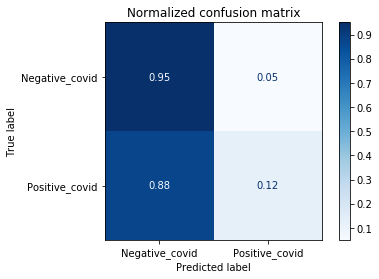

In [90]:
Confusion_matrix(model_recall, X_test_,Y_test_, normalized = True)

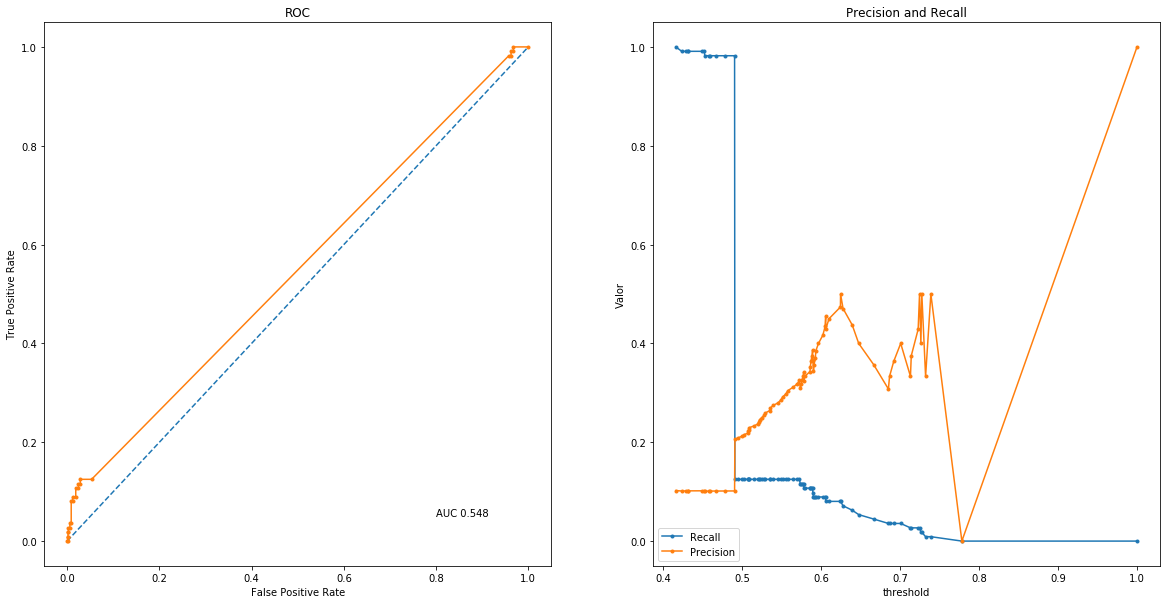

In [91]:
Chart_report(model_recall, X_test_,Y_test_)

In [92]:
model_recall

LogisticRegression(C=0.01, class_weight={0: 0.5, 1: 0.5}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=200, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)